In [145]:
import json
import pandas as pd
import seaborn as sns
from PIL import Image
import os, errno

import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [146]:
root = f"O:\eve_live_logs\game_state_cake_layer_1_v1"
raw = json.loads(open(f"{root}\\image_data.json").read())

In [147]:
df = pd.DataFrame(raw['results'])
df['value_at_argmax'] = df['value_at_argmax'].astype('float')
df['tick'] = 1
df

,epoc_time,argmax_index,value_at_argmax,class,classes,scores,id,image_saved,model_name,tick
0,1682309720966.835,0,1.000000,in_flight,"[in_flight, in_hanger, sub_app]","[1.0, 1.2059897599552886e-32, 0.0]",199256d4-e235-11ed-bb8b-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
1,1682309731435.406,0,1.000000,in_flight,"[in_flight, in_hanger, sub_app]","[1.0, 1.8367773965355614e-31, 2.26519546433490...",1fdb01f4-e235-11ed-9797-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
2,1682309741767.6548,0,1.000000,in_flight,"[in_flight, in_hanger, sub_app]","[1.0, 5.1911729690372764e-33, 0.0]",2603ca8b-e235-11ed-b0ab-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
3,1682309752113.3599,0,1.000000,in_flight,"[in_flight, in_hanger, sub_app]","[1.0, 3.5140547857944886e-31, 0.0]",2c2e3693-e235-11ed-9557-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
4,1682309762463.171,0,1.000000,in_flight,"[in_flight, in_hanger, sub_app]","[1.0, 3.5754910649915745e-35, 0.0]",3259c62f-e235-11ed-a86d-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
...,...,...,...,...,...,...,...,...,...,...
98,1682313279644.213,0,1.000000,in_flight,"[in_flight, in_hanger, sub_app]","[1.0, 9.714020698936565e-09, 3.189134720193998...",62c0666c-e23d-11ed-ac83-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
99,1682313280899.509,0,1.000000,in_flight,"[in_flight, in_hanger, sub_app]","[1.0, 2.6970038646823014e-08, 9.23401806407486...",637fca74-e23d-11ed-a219-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
100,1682313282133.574,0,1.000000,in_flight,"[in_flight, in_hanger, sub_app]","[1.0, 8.656864114442442e-10, 1.191720420262720...",643bc9ed-e23d-11ed-b1c8-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
101,1682313283369.118,0,0.999704,in_flight,"[in_flight, in_hanger, sub_app]","[0.9997041821479797, 0.0002957308606710285, 1....",64f8c68b-e23d-11ed-9f6b-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1


In [148]:
df.groupby('class')['tick'].sum()

class
in_flight    98
in_hanger     5
Name: tick, dtype: int64

In [153]:
poor_performance = df.sort_values(by='value_at_argmax')
poor_performance_working_set = poor_performance[poor_performance['value_at_argmax'] < 0.999]
print(len(poor_performance_working_set))
poor_performance_working_set

11


,epoc_time,argmax_index,value_at_argmax,class,classes,scores,id,image_saved,model_name,tick
83,1682313260471.077,0,0.519257,in_flight,"[in_flight, in_hanger, sub_app]","[0.5192564725875854, 0.4807295501232147, 1.401...",575281aa-e23d-11ed-ade6-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
45,1682313213113.828,0,0.625005,in_flight,"[in_flight, in_hanger, sub_app]","[0.6250048875808716, 0.3749951124191284, 7.128...",3b188422-e23d-11ed-a02a-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
49,1682313218129.23,0,0.661492,in_flight,"[in_flight, in_hanger, sub_app]","[0.6614924669265747, 0.3385075628757477, 4.187...",3e15ce59-e23d-11ed-9fda-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
66,1682313238829.791,0,0.906056,in_flight,"[in_flight, in_hanger, sub_app]","[0.9060556292533875, 0.09394436329603195, 1.61...",4a6c4d83-e23d-11ed-b787-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
39,1682313205514.7878,0,0.970620,in_flight,"[in_flight, in_hanger, sub_app]","[0.9706200361251831, 0.029379939660429955, 4.3...",3690d795-e23d-11ed-bb14-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
85,1682313263142.802,1,0.976642,in_hanger,"[in_flight, in_hanger, sub_app]","[0.023358426988124847, 0.9766415953636169, 1.7...",58ea7bf9-e23d-11ed-aba0-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
67,1682313240184.1929,0,0.977063,in_flight,"[in_flight, in_hanger, sub_app]","[0.9770631790161133, 0.022936876863241196, 6.2...",4b3b204c-e23d-11ed-a73b-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
58,1682313229187.836,1,0.995980,in_hanger,"[in_flight, in_hanger, sub_app]","[0.004019575659185648, 0.9959803819656372, 3.7...",44ad2093-e23d-11ed-abcb-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
87,1682313265847.74,0,0.998353,in_flight,"[in_flight, in_hanger, sub_app]","[0.9983527660369873, 0.0016472466522827744, 2....",5a86eb92-e23d-11ed-857f-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1
76,1682313251668.9192,0,0.998525,in_flight,"[in_flight, in_hanger, sub_app]","[0.9985248446464539, 0.001475209603086114, 1.3...",52138df7-e23d-11ed-a3a5-2cf05d9fe8eb,0,game_state_cake_layer_1_v1,1


In [154]:
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise
        
def copy(source, destination):
    with open(source, 'rb') as file:
        myFile = file.read()
    with open(destination, 'wb') as file:
        file.write(myFile)

In [155]:
for index in poor_performance_working_set.index:
    record = poor_performance.loc[index]
    source =f"{root}\\{record['class']}\\{record['id']}.png"
    dest = f"O:\\eve_models\\training_data\\reclass\\{record['id']}.png"
    copy(source, dest)
    

invalid


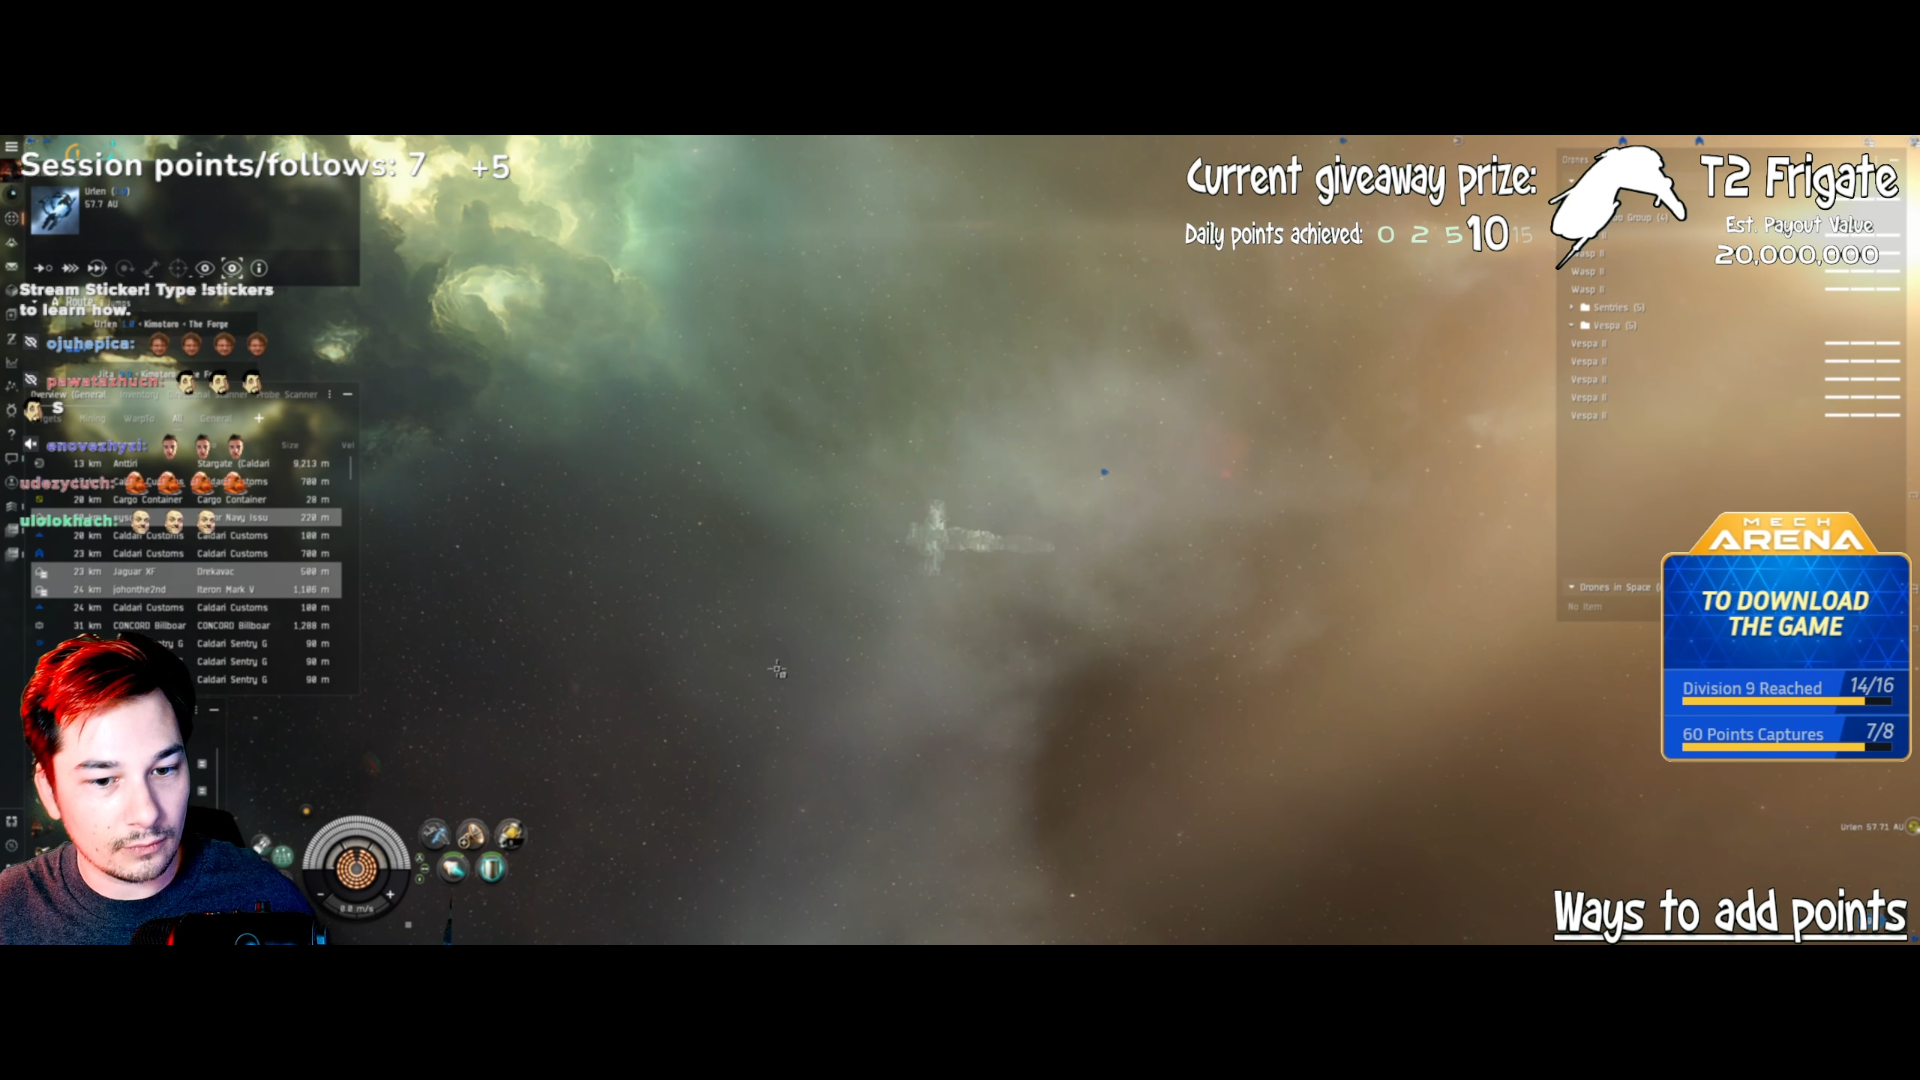

In [131]:
record = poor_performance.loc[106]
print(record['class'])
Image.open(f"{root}\\{record['class']}\\{record['id']}.png")